### Universality: Random Walk Brownian motion

Last lecture we viewed the central limit theorem as a manifestation of universality in randomness. 
We found that the normalized sums 
```normsum =sum[rv() for _ in range(n)]/n**(0.5)```
have a distribution that does not depend on `rv`.
. E.g. `rv` could be a `dice roll`, `coin flip`, or `strange_random_variable` that we defined. 

Plotting a histogram of samples of `normsum` always gave us a gaussian.

Today we'll see a related phenomon for random walk.

1. Suppose a random walker starts at an integer x in [-10,10]
and walks to the left (-1) with probability 1/2 and to the right with probability 1/2. 

What is the probability that the walker leaves at -5 instead of 5? This will depend on x. 

E.g. for x=0 it will be 0.5.
How does the answer depend on x?
Plot this dependence, with x ranging from [-5,5].

2. Now suppose the walker takes smaller steps, like (-0.1) and (+0.1). What are the probabilities now?

3. Now suppose that the walker does a more complicated random walk. Their new step distribution is:

- step = -1 with probability 1/2
- step = -2 with probability 1/4
- step = 4 with probability 1/4

Notice that the expected step is still 0,
because -1 (1/2) + -2 (1/4) + 4 (1/4) = 0.
But the walk is now asymmetric.

Answer Q1 and Q2 again.

Q5. Now consider a two-dimensional random walker,
starting at (0,0). Suppose he takes a N/S/E/W  of `stepSize=0.01` with equal probability, 1/4. Suppose he keeps walking until he leaves the unit circle $x^2+y^2\leq 1$. What is the probability that he leaves via the top right quadrant? What is the probability that he leaves via the arc from angle 0 to angle 20 degrees?
What happens when you decrease the stepsize?


Q6. Draw the path of one of these random walkers.

Q7. Choose another step distribution and repeat the above. 
E.g. 
- (0,3) with probability 1/3
- (0,-6) with probability 1/6
- (-2,0) with probability 1/4
- (4,0) with probability 1/8


 

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
#1 
def hitsNeg5First(x):
  '''
  Simulate symmetric -1,1 random walk starting from x
  until it leaves (-5,5).
  Returns 1 if it leaves at -5, and returns 0 if it leaves at 5.
  '''
  currentPosition = x
  lim = [i for i in range(-5, 6)]

  while currentPosition in lim:
    if random.random() > 0.5:
      currentPosition += 1
    else:
      currentPosition -=1

  if currentPosition <= -5:
    return 1 
  else:
    return 0

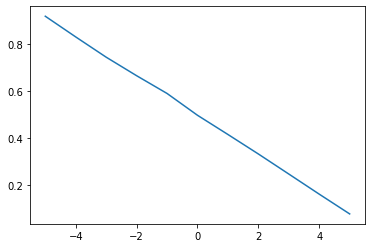

In [ ]:
start = [i for i in range(-5, 6)]
end = []
for x in start:
  results = [hitsNeg5First(x) for _ in range(10000)]
  prob = sum(results)/len(results)
  end.append(prob)

plt.plot(start, end)

In [ ]:
#2
def hitsNeg5First(x, stepSize = 1):
  '''
  Simulate symmetric -1,1 random walk starting from x
  until it leaves [-5,5], but scale the walk so that the stepsizes are given by 
  stepSize instead of 1.
  Returns 1 if it leaves at -5, and returns 0 if it leaves at 5.
  '''
  currentPosition = x

  while currentPosition < 5 and currentPosition > -5:
    if random.random() > 0.5:
      currentPosition += stepSize
    else:
      currentPosition -= stepSize

  if currentPosition <= -5:
    return 1 
  else:
    return 0

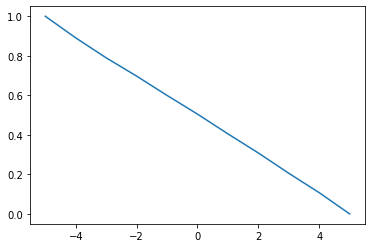

In [ ]:
start = [i for i in range(-5, 6)]
end = []
for x in start:
  results = [hitsNeg5First(x, 0.1) for _ in range(10000)]
  prob = sum(results)/len(results)
  end.append(prob)

plt.plot(start, end)

In [ ]:
#3/#4 
def stepDist():
  x = random.random()
  if x < 1/2:
    return -1
  elif x < 3/4:
    return -2
  else:
    return -4

def hitsNeg5First(x, stepSize, stepDistribution):
  '''
  Simulate  random walk starting from x
  with given stepDistribution
  until it leaves [-5,5], but scale the walk so that the stepsizes are given by 
  stepSize instead of 1.
  Returns 1 if it leaves at -5, and returns 0 if it leaves at 5.
  '''
  currentPosition = x
  step = stepDistribution()

  while currentPosition < 5 and currentPosition > -5:
    if random.random() > 0.5:
      currentPosition += stepSize*step
    else:
      currentPosition -= stepSize*step

  if currentPosition <= -5:
    return 1 
  else:
    return 0
  print(step)

# Hint: run 
# hitsNeg5First(0, 0.5, stepDist)
# to figure out what is going on.
# Then modify the code.

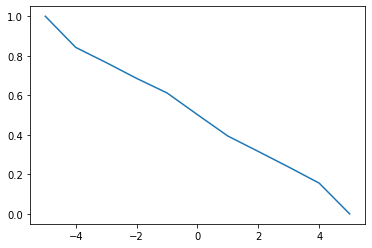

In [ ]:
#4a
start = [i for i in range(-5, 6)]
end = []
for x in start:
  results = [hitsNeg5First(x, 1, stepDist) for _ in range(10000)]
  prob = sum(results)/len(results)
  end.append(prob)

plt.plot(start, end)

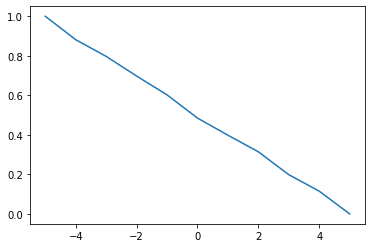

In [ ]:
#4b
start = [i for i in range(-5, 6)]
end = []
for x in start:
  results = [hitsNeg5First(x, 0.5, stepDist) for _ in range(10000)]
  prob = sum(results)/len(results)
  end.append(prob)

plt.plot(start, end)

Q5. Now consider a two-dimensional random walker, starting at (0,0). Suppose he takes a N/S/E/W of stepSize=0.01 with equal probability, 1/4. Suppose he keeps walking until he leaves the unit circle  x2+y2≤1 . What is the probability that he leaves via the top right quadrant? What is the probability that he leaves via the arc from angle 0 to angle 20 degrees? What happens when you decrease the stepsize?



In [ ]:
#5 
def twoDimWalk():
  x_pos = 0
  y_pos = 0
  stepSize = 0.1
  while (x_pos**2+y_pos**2) < 1:
    prob = random.random()
    if prob < 0.25:
      y_pos += stepSize
    elif prob < 0.5:
      x_pos += stepSize
    elif prob < 0.75:
      y_pos -= stepSize
    else:
      x_pos -= stepSize
  
  return (x_pos, y_pos)

In [ ]:
#probability of leaving top right quadrant
results = []

for _ in range(10000):
  x, y = twoDimWalk()

  if x > 0 and y > 0:
    results.append(1)
  else:
    results.append(0)

print(sum(results)/10000)

0.2646


In [ ]:
#probability of leaving arc from 0 < angle < 20
import math

results = []

for _ in range(10000):
  x, y = twoDimWalk()

  if x != 0:
    angle = math.degrees(math.atan(y/x))
   
    if angle > 0 and angle < 20:
      results.append(1)
    else:
      results.append(0)
  else:
    results.append(0)

print(sum(results)/10000)

10000
0.1242


TypeError: ignored

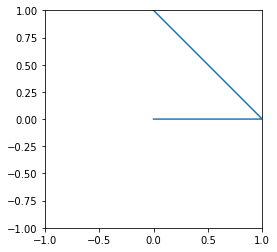

In [ ]:
# 6
# This may be helpful
plt.axes().set_aspect(1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot([0,1,0],[0,0,1])

import numpy as np

def twoDimWalk():
  x_pos = 0
  y_pos = 0
  all_steps = []
  stepSize = 0.1
  while (x_pos**2+y_pos**2) < 1:
    prob = random.random()
    if prob < 0.25:
      y_pos += stepSize
    elif prob < 0.5:
      x_pos += stepSize
    elif prob < 0.75:
      y_pos -= stepSize
    else:
      x_pos -= stepSize
    all_steps.append((x_pos, y_pos))
  
  return all_steps

plt.scatter(twoDimWalk())